In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
adnimerge=pd.read_csv('../data/ADNIMERGE_14Oct2024.csv')
unsam_data=pd.read_csv('../data/UNSAMparticipants.csv')

BAN_ADNI=pd.read_csv('../results/BrainAgeNeXt/BAN_ADNI.csv')
DBN_ADNI=pd.read_csv('../results/DeepBrainNet/DBN_ADNI_BET.csv')
pyment_ADNI=pd.read_csv('../results/pyment/pyment_ADNI.csv')
ENIGMA_ADNI=pd.read_csv('../results/ENIGMA/ENIGMA_ADNI.csv')

C:\Users\parri\AppData\Local\Temp\ipykernel_31448\2984174052.py:1: DtypeWarning:

Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.



In [147]:
adnimerge=adnimerge[['PTID','PTRACCAT','PTEDUCAT']]
unsam_data=unsam_data[['ID','NivelEducativo']]

In [148]:
#only keep CN participants
BAN_ADNI=BAN_ADNI[BAN_ADNI['Group']=='CN']
DBN_ADNI=DBN_ADNI[DBN_ADNI['Group']=='CN']
pyment_ADNI=pyment_ADNI[pyment_ADNI['Group']=='CN']
ENIGMA_ADNI=ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN']

In [149]:
#merge predictions with adnimerge
BAN_ADNI['PTID']=BAN_ADNI['ID'].str.split('_I').str[0]
DBN_ADNI['PTID']=DBN_ADNI['ID'].str.split('_I').str[0]
pyment_ADNI['PTID']=pyment_ADNI['ID'].str.split('_I').str[0]
ENIGMA_ADNI['PTID']=ENIGMA_ADNI['ID'].str.split('_I').str[0]

BAN_ADNI=pd.merge(BAN_ADNI,adnimerge,on='PTID', how='inner')
DBN_ADNI=pd.merge(DBN_ADNI,adnimerge,on='PTID',how='inner')
pyment_ADNI=pd.merge(pyment_ADNI,adnimerge,on='PTID',how='inner')
ENIGMA_ADNI=pd.merge(ENIGMA_ADNI,adnimerge,on='PTID',how='inner')

pyment_ADNI.drop_duplicates(subset=['ID'], keep='first', inplace=True,ignore_index=True)
DBN_ADNI.drop_duplicates(subset=['ID'], keep='first', inplace=True,ignore_index=True)
ENIGMA_ADNI.drop_duplicates(subset=['ID'], keep='first', inplace=True,ignore_index=True)
BAN_ADNI.drop_duplicates(subset=['ID'], keep='first', inplace=True,ignore_index=True)

In [150]:
#add model name to id
BAN_ADNI['ID']=BAN_ADNI['ID']+'_BAN'
DBN_ADNI['ID']=DBN_ADNI['ID']+'_DBN'
pyment_ADNI['ID']=pyment_ADNI['ID']+'_pyment'
ENIGMA_ADNI['ID']=ENIGMA_ADNI['ID']+'_enigma'

In [151]:
#prepare dataframes for concatenation
BAN_ADNI=BAN_ADNI[['ID','Age','Error','Absolute_Error','PTRACCAT','PTEDUCAT']]
DBN_ADNI.rename(columns={'Absolute_error':'Absolute_Error'}, inplace=True)
DBN_ADNI=DBN_ADNI[['ID','Age','Error','Absolute_Error','PTRACCAT','PTEDUCAT']]
pyment_ADNI=pyment_ADNI[['ID','Age','Error','Absolute_Error','PTRACCAT','PTEDUCAT']]
ENIGMA_ADNI.rename(columns={'Absolute Error':'Absolute_Error'}, inplace=True)
ENIGMA_ADNI=ENIGMA_ADNI[['ID','Age','Error','Absolute_Error','PTRACCAT','PTEDUCAT']]

In [152]:
#concat dataframes
ADNI_concat=pd.concat([BAN_ADNI,DBN_ADNI,pyment_ADNI,ENIGMA_ADNI], ignore_index=True)

In [153]:
#porcentaje de cantidad de sujetos por grupo étnico
ADNI_concat['PTRACCAT'].value_counts(normalize=True)*100

PTRACCAT
White                83.162518
Black                11.615422
More than one         2.391410
Asian                 2.244998
Unknown               0.390434
Am Indian/Alaskan     0.195217
Name: proportion, dtype: float64

In [154]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

In [155]:
#boxplot for BAG by ethnicity

median_white = ADNI_concat[ADNI_concat['PTRACCAT']=='White']['Error'].median()
median_black = ADNI_concat[ADNI_concat['PTRACCAT']=='Black']['Error'].median()
median_mto= ADNI_concat[ADNI_concat['PTRACCAT']=='More than one']['Error'].median()
median_asian = ADNI_concat[ADNI_concat['PTRACCAT']=='Asian']['Error'].median()
unknown_median = ADNI_concat[ADNI_concat['PTRACCAT']=='Unknown']['Error'].median()
indala_median = ADNI_concat[ADNI_concat['PTRACCAT']=='Am Indian/Alaskan']['Error'].median()

# Calcular porcentajes por etnicidad
ethnicity_counts = ADNI_concat['PTRACCAT'].value_counts(normalize=True) * 100
ethnicity_pct = {
    'White': ethnicity_counts.get('White', 0),
    'Black': ethnicity_counts.get('Black', 0),
    'More than one': ethnicity_counts.get('More than one', 0),
    'Asian': ethnicity_counts.get('Asian', 0),
    'Unknown': ethnicity_counts.get('Unknown', 0),
    'Am Indian/Alaskan': ethnicity_counts.get('Am Indian/Alaskan', 0)
}

# Crear labels con porcentajes
ethnicity_labels = [
    f"White<br>({ethnicity_pct['White']:.1f}%)",
    f"Black<br>({ethnicity_pct['Black']:.1f}%)",
    f"More than one<br>({ethnicity_pct['More than one']:.1f}%)",
    f"Asian<br>({ethnicity_pct['Asian']:.1f}%)",
    f"Unknown<br>({ethnicity_pct['Unknown']:.1f}%)",
    f"Am Indian/Alaskan<br>({ethnicity_pct['Am Indian/Alaskan']:.1f}%)"
]

fig = px.box(ADNI_concat, x='PTRACCAT', y='Error', color_discrete_sequence=['red'])
fig.update_xaxes(tickfont=dict(size=14), title_font=dict(size=18), ticktext=ethnicity_labels, tickvals=["White", "Black", "More than one", "Asian", "Unknown", "Am Indian/Alaskan"])
fig.update_yaxes(tickfont=dict(size=14), title_font=dict(size=18), showgrid=True, gridcolor='grey', zeroline=True, zerolinecolor='black')
fig.update_layout(font=dict(size=14, color='black'), title_font=dict(size=18))
fig.update_layout(title='Brain Age Gap by Ethnicity in the ADNI cohort (CN participants)',
                  xaxis_title='Ethnicity',
                  yaxis_title='Brain Age Gap',
                  width=800,
                  height=500)

#agregar los valores de la mediana encima de cada caja
fig.add_trace(go.Scatter(
    x=["White", "Black", "More than one", "Asian", "Unknown", "Am Indian/Alaskan"],
    y=[median_white, median_black, median_mto, median_asian, unknown_median, indala_median],
    mode="text",
    text=[f"{median_white:.2f}", f"{median_black:.2f}", f"{median_mto:.2f}", f"{median_asian:.2f}", f"{unknown_median:.2f}", f"{indala_median:.2f}"],
    textposition="top center",
    textfont=dict(
            color='black',
            size=17,
            family='Arial'
        ),
    showlegend=False
))
fig.show()

In [156]:
from scipy import stats

In [157]:

def t_test_error(df, group1, group2):
    group1_errors = df[df['PTRACCAT'] == group1]['Error']
    group2_errors = df[df['PTRACCAT'] == group2]['Error']
    t_stat, p_value = stats.ttest_ind(group1_errors, group2_errors, equal_var=False)
    return t_stat, p_value

datasets = {
    'ADNI_concat': ADNI_concat,
}

results = {}
for name, df in datasets.items():
    ethnicity_groups = df['PTRACCAT'].unique()
    results[name] = {}
    for i, group1 in enumerate(ethnicity_groups):
        for group2 in ethnicity_groups[i+1:]:
            t_stat, p_value = t_test_error(df, group1, group2)
            results[name][f"{group1} vs {group2}"] = {'t_stat': t_stat, 'p_value': p_value}

# Show results
for name, comparisons in results.items():
    print(f"\n{name}:")
    for comparison, result in comparisons.items():
        print(f"  {comparison}: t-statistic = {result['t_stat']:.3f}, p-value = {result['p_value']:.3f}")


ADNI_concat:
  White vs Black: t-statistic = 0.156, p-value = 0.876
  White vs Asian: t-statistic = -2.460, p-value = 0.018
  White vs More than one: t-statistic = -1.928, p-value = 0.059
  White vs Unknown: t-statistic = 0.144, p-value = 0.890
  White vs Am Indian/Alaskan: t-statistic = -2.307, p-value = 0.103
  Black vs Asian: t-statistic = -2.340, p-value = 0.022
  Black vs More than one: t-statistic = -1.779, p-value = 0.079
  Black vs Unknown: t-statistic = 0.103, p-value = 0.921
  Black vs Am Indian/Alaskan: t-statistic = -2.298, p-value = 0.098
  Asian vs More than one: t-statistic = 0.798, p-value = 0.427
  Asian vs Unknown: t-statistic = 1.265, p-value = 0.232
  Asian vs Am Indian/Alaskan: t-statistic = -1.027, p-value = 0.357
  More than one vs Unknown: t-statistic = 0.848, p-value = 0.418
  More than one vs Am Indian/Alaskan: t-statistic = -1.514, p-value = 0.208
  Unknown vs Am Indian/Alaskan: t-statistic = -1.798, p-value = 0.111


Shapiro-Wilk p-value: 2.040750380342455e-24
Anderson-Darling stat: 27.992963906901196
Critical values: [0.575 0.654 0.785 0.916 1.089]


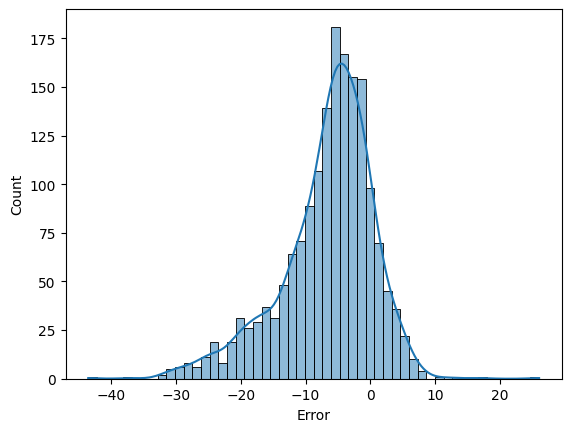

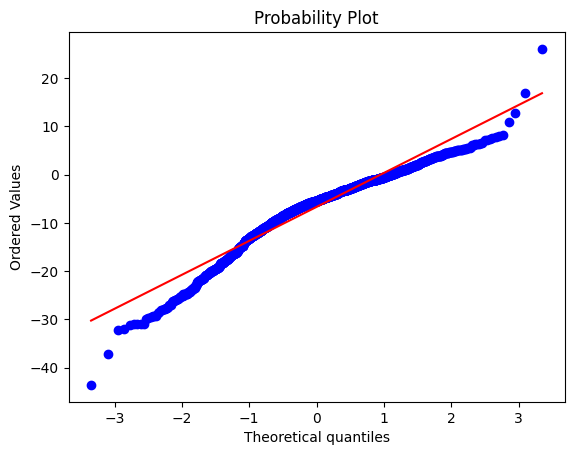

In [164]:
from scipy.stats import shapiro, normaltest, anderson

# Shapiro-Wilk test for normality
variable = ADNI_concat[ADNI_concat['PTRACCAT']=='White']['Error']

stat, p = shapiro(variable)
print("Shapiro-Wilk p-value:", p)

# Anderson-Darling test
result = anderson(variable)
print("Anderson-Darling stat:", result.statistic)
print("Critical values:", result.critical_values)

sns.histplot(variable, kde=True)
plt.show()
stats.probplot(variable, dist="norm", plot=plt)
plt.show()



In [169]:
#mean absolute error by PTRACCAT
print(f'White MAE',ADNI_concat[ADNI_concat['PTRACCAT']=='White']['Absolute_Error'].mean())
print(f'Black MAE',ADNI_concat[ADNI_concat['PTRACCAT']=='Black']['Absolute_Error'].mean())
print(f'Asian MAE',ADNI_concat[ADNI_concat['PTRACCAT']=='Asian']['Absolute_Error'].mean())
print(f'More than one MAE',ADNI_concat[ADNI_concat['PTRACCAT']=='More than one']['Absolute_Error'].mean())
print(f'Unknown MAE',ADNI_concat[ADNI_concat['PTRACCAT']=='Unknown']['Absolute_Error'].mean())
print(f'Indian American MAE',ADNI_concat[ADNI_concat['PTRACCAT']=='Am Indian/Alaskan']['Absolute_Error'].mean())

White MAE 7.420606043285184
Black MAE 7.676686566456521
Asian MAE 6.0143469287149705
More than one MAE 5.636214094986973
Unknown MAE 7.439206950713996
Indian American MAE 3.1870004897578283
